In [ ]:
import tensorflow as tf
import warnings

warnings.filterwarnings("ignore")

C:\Users\lenovo\anaconda3\envs\DL_s7_lab\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\lenovo\anaconda3\envs\DL_s7_lab\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\lenovo\anaconda3\envs\DL_s7_lab\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\lenovo\anaconda3\envs\DL_s7_lab\lib\site-packages

In [ ]:
import numpy as np
import pandas as pd

from tensorflow.keras.datasets import cifar10

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
x_train[:1]

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [ ]:
y_test[:20]

array([[3],
       [8],
       [8],
       [0],
       [6],
       [6],
       [1],
       [6],
       [3],
       [1],
       [0],
       [9],
       [5],
       [7],
       [9],
       [8],
       [5],
       [7],
       [8],
       [6]])

In [ ]:
x_train, x_test = x_train/255.0, x_test/255.0

x_train[1].shape

(32, 32, 3)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train, y_test =  to_categorical(y_train), to_categorical(y_test)

In [ ]:
y_train[1].shape

(10,)

In [ ]:
from tensorflow.keras import layers, models


model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation="relu"),
    layers.Dense(256, activation="sigmoid"),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
____________________________________________________________

In [ ]:
history = model.fit(x_train, y_train, epochs=25, batch_size=64, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 8s 162us/sample - loss: 1.4154 - acc: 0.4942 - val_loss: 1.4485 - val_acc: 0.4833
Epoch 2/25
50000/50000 [==============================] - 8s 157us/sample - loss: 1.3875 - acc: 0.5027 - val_loss: 1.4051 - val_acc: 0.5013
Epoch 3/25
50000/50000 [==============================] - 8s 151us/sample - loss: 1.3550 - acc: 0.5132 - val_loss: 1.4664 - val_acc: 0.4792
Epoch 4/25
50000/50000 [==============================] - 8s 151us/sample - loss: 1.3267 - acc: 0.5246 - val_loss: 1.4120 - val_acc: 0.4953
Epoch 5/25
50000/50000 [==============================] - 8s 151us/sample - loss: 1.2988 - acc: 0.5349 - val_loss: 1.3989 - val_acc: 0.5011
Epoch 6/25
50000/50000 [==============================] - 8s 151us/sample - loss: 1.2693 - acc: 0.5448 - val_loss: 1.3722 - val_acc: 0.5076
Epoch 7/25
50000/50000 [==============================] - 8s 153us/sample - loss: 1.2426 - acc: 0.5559 - val_l

In [ ]:
import matplotlib.pyplot as plt

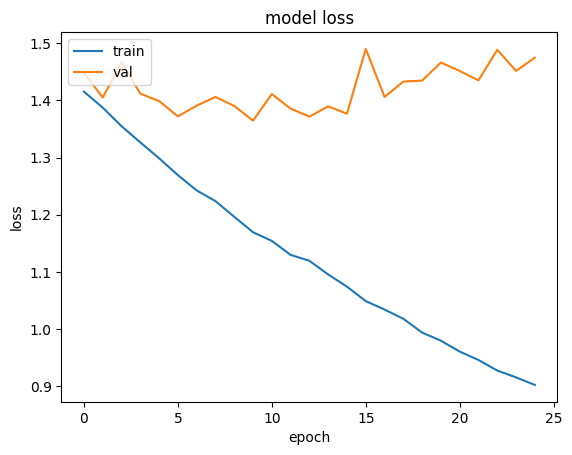

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

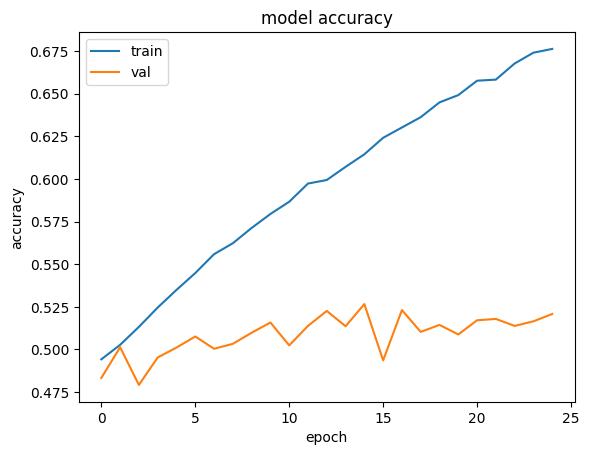

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
def output_plot(image):

    class_labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
    fig, axs = plt.subplots(1, 2, figsize=(10, 2))

    predictions = model.predict(image.reshape(1, 32, 32, 3))

    axs[0].imshow(image)
    axs[0].axis('off')
    prediction_values = predictions[0]

    max_index = np.argmax(prediction_values)
    colors = ['green' if i == max_index else 'blue' for i in range(len(class_labels))]

    axs[1].barh(class_labels, prediction_values, color=colors)
    axs[1].set_xlim([0, 1])

    plt.tight_layout()
    plt.show()


(32, 32, 3)


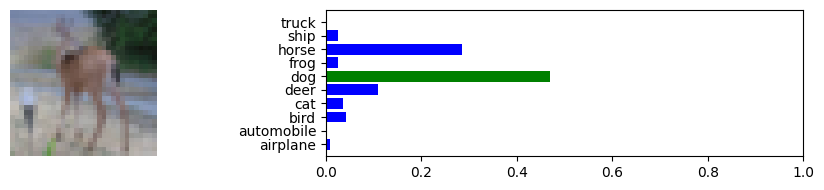

(32, 32, 3)


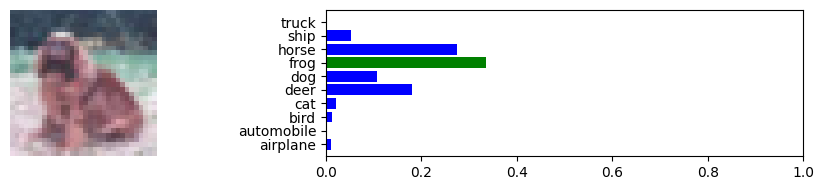

(32, 32, 3)


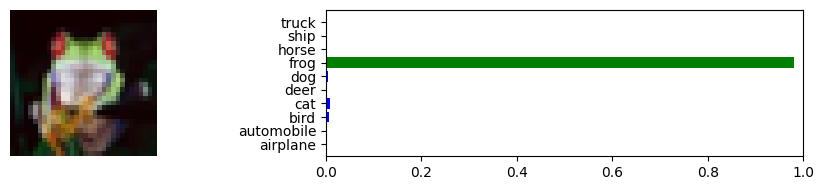

(32, 32, 3)


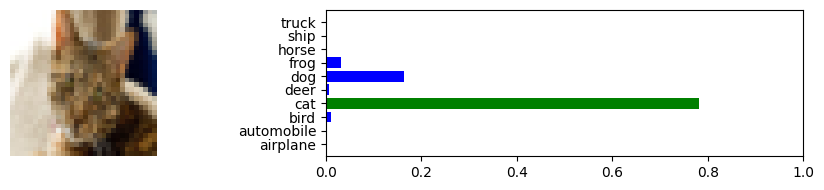

(32, 32, 3)


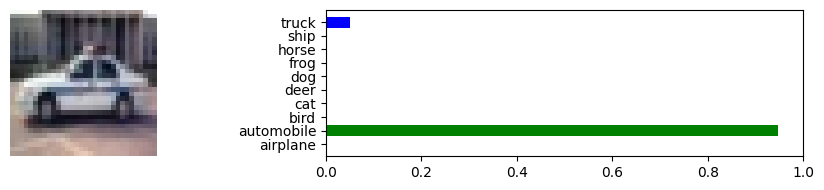

In [ ]:
for i in x_test[100:105]:
    print(i.shape)
    output_plot(i)